## Lab 8 - Multivariable Optimization

#### Q1) For the function J(w) = w^2 + (54/w), implement the following methods: (a) Use the .bracketed value (that you got in the last lab) to get to the critical point employing interval halving method and (b) identify the critical point using Newton-Raphson method and (c) verify the result manually using the optimality criteria (post this write-up as well in .jpg/.png etc).

#### Q1(a) 

In [17]:
import numpy as np

# Function J(w)
def J(w):
    return w**2 + 54 / w

# Derivative of J(w)
def dJ(w):
    return 2 * w - 54 / (w**2)

# Using interval halving method
def make_half(J, dJ, a, b, tolerance=1e-5):
    """
    I am using interval halfing methid to findig teh critical point of J(w).
    
    assumed soem parameters name:
    J: Function whose critical points are to be found.
    dJ: Derivative of J.
    a, b: Interval boundaries.
    tolerance: Convergence criterion.
    """

    while (b - a) > tolerance:
        mid = (a + b) / 2
        if dJ(mid) == 0:
            return mid
        elif dJ(mid) * dJ(a) < 0:
            b = mid
        else:
            a = mid
    return (a + b) / 2

# Define the interval
a, b = 1, 10

# Find the critical point using interval halving
critical_point = make_half(J, dJ, a, b)

# Function value calculation at the critical point
function_value = J(critical_point)

# Display results
print("Using Interval Halving Method:")
print("Critical Point:", critical_point)
print("Function Value at Critical Point:", function_value)


Using Interval Halving Method:
Critical Point: 2.9999966621398926
Function Value at Critical Point: 27.000000000033424


#### Q1(b)

In [18]:
# Double derivative of J(w)
def ddJ(w):
    return 2 + 108 / (w**3)

# Newton-Raphson method
def newton_raphson_method(J, dJ, ddJ, initial_guess, tolerance=1e-5, max_iterations=100):
    """
    Uses the Newton-Raphson method to find a critical point of J(w).
    
    Parameters:
    J: Function whose critical points are to be found.
    dJ: First derivative of J.
    ddJ: Second derivative (Hessian).
    initial_guess: Starting point for the iteration.
    tolerance: Convergence criterion.
    max_iterations: Maximum number of iterations before stopping.
    """
    w = initial_guess
    for _ in range(max_iterations):
        gradient = dJ(w)
        hessian_matrix_value = ddJ(w) #becuase here only one variable

        if abs(gradient) < tolerance:  
            return w

        if hessian_matrix_value == 0:  # Prevent division by zero
            print("Warning: Second derivative is zero. Newton-Raphson may fail.")
            return w
        
        w = w - gradient / hessian_matrix_value  # Newton-Raphson method
    
    return w  
    
# Initial guess for Newton-Raphson method
initial_guess = 8

# Find the critical point using Newton-Raphson method
critical_point_by_newton_raphson = newton_raphson_method(J, dJ, ddJ, initial_guess)

# Evaluate the function value at the critical point
function_value_newton_raphson = J(critical_point_by_newton_raphson)

# my results output
print("\nNewton-Raphson Method:")
print("Critical Point:", critical_point_by_newton_raphson)
print("Function Value at Critical Point:", function_value_newton_raphson)



Newton-Raphson Method:
Critical Point: 2.999999999395497
Function Value at Critical Point: 27.0


#### Q2) For the function f(w1,w2) = (w1-8)^2+ (w2-8)^2. Perform a line search along the direction vector (1,2) starting from the point (0,0) to find the minimum value of f.

In [19]:
import numpy as np

def f(w1, w2):
    return (w1 - 8)**2 + (w2 - 8)**2
    
# direction vector is S
S = np.array([1, 2])

def unidirecn_search(start_point, S):
# using W*=W_s+alpha*S

    def f_alpha(alpha):
        new_point = start_point + alpha * S
        return f(new_point[0], new_point[1])
    
    # Analytical solution for alpha minimizing f_alpha(alpha)
    alpha_star = np.dot(S, np.array([16,16]) - start_point) / np.dot(S, S)
    return alpha_star

# input Starting point and direction vectors
start_point = np.array([0, 0])

optimal_alpha = unidirecn_search(start_point, S)
optimal_point = start_point + optimal_alpha * S

minimum_value = f(optimal_point[0], optimal_point[1])

# Results
print("Optimized value of alpha:", optimal_alpha)
print("Optimal point:", optimal_point)
print("Minimum value of given funcitojn f:", minimum_value)

Optimized value of alpha: 9.6
Optimal point: [ 9.6 19.2]
Minimum value of given funcitojn f: 127.99999999999999


#### Q3) Implement a gradient descent (GD) algorithm in Python to optimize a given objective function. The goal is to minimize the following function:
#### f(x) = 1/n (xi-2)2+ 0.1(xi- xi+1)2

In [20]:
import numpy as np

# Gradient Descent Function
def grad_desc(grad_f, x0, lr, iterations):
    x = x0.copy()
    for _ in range(iterations):
        x -= lr * grad_f(x)
    return x

# Objective Function
def given_func(x):
    n = len(x)
    t1 = np.sum((x - 2)**2) / n
    t2 = 0.1 * np.sum((x[:-1] - x[1:])**2)
    return t2 + t1

# calculete griedenint of given function
def grad(x):
    n = len(x)
    g = np.zeros_like(x)
    
    # Derivative of term1
    g += 2 * (x - 2) / n
    
    # Derivative of term2 (smoothness term)
    g[:-1] += 0.2 * (x[:-1] - x[1:])
    g[1:]  -= 0.2 * (x[:-1] - x[1:])
    
    return g

# Input parameters
n = 8
x0 = np.random.rand(n)
lr = 0.05
iterations = 1000

# Run Gradient Descent
x_opt = grad_desc(grad, x0, lr, iterations)

# Results
print("Optimized solution:", x_opt)
print("Objective function value:", given_func(x_opt))


Optimized solution: [1.9999951  1.99999507 1.99999503 1.99999497 1.9999949  1.99999484
 1.9999948  1.99999478]
Objective function value: 2.566811831561876e-11


#### Q4) Visualize the optimization process of the function f(x,y)=(x−10)^2+(y−10)^2 using a contour plot and mark the path taken by the gradient descent algorithm to reach the minimum.

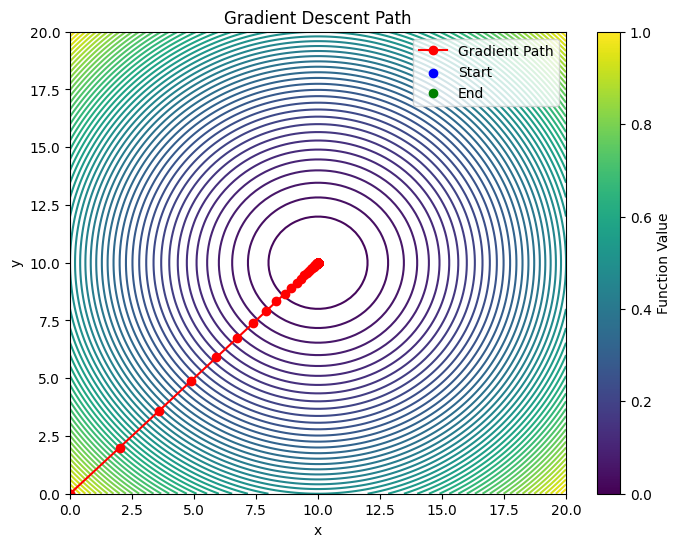

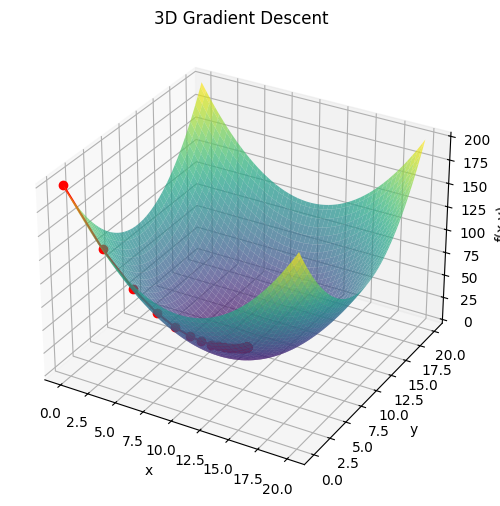

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Define function
def f(x, y):
    return (x - 10) ** 2 + (y - 10) ** 2

# Compute gradient
def grad(x, y):
    return np.array([2 * (x - 10), 2 * (y - 10)])

# Gradient descent

def gd(start, lr, steps):
    path = [start]
    p = np.array(start, dtype=np.float64)
    
    for _ in range(steps):
        g = grad(p[0], p[1])
        p -= lr * g
        path.append(p.copy())
    
    return np.array(path)

# Parameters
lr = 0.1
steps = 5000
start = [0, 0]

# Run gradient descent
path = gd(start, lr, steps)

# Create grid
x = np.linspace(0, 20, 100)
y = np.linspace(0, 20, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Plot 2D contour
plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.plot(path[:, 0], path[:, 1], 'r-o', label='Gradient Path')
plt.scatter(start[0], start[1], color='blue', label='Start')
plt.scatter(path[-1][0], path[-1][1], color='green', label='End')

# Labels & display
plt.title('Gradient Descent Path')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Function Value')
plt.legend()
plt.show()

# 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)
ax.plot(path[:, 0], path[:, 1], f(path[:, 0], path[:, 1]), 'r-o', label='Gradient Path')

# Labels
ax.set_title('3D Gradient Descent')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
plt.show()


In [ ]:
### Learning Outcomes --> Dive into differnet type of methods and algorithms o calculus.